In [ ]:

%load_ext autoreload
%autoreload 2
from prepareData.queries.get_output_data import get_output_data
import time
import numpy as np
from prepareData.getBatchData import get_batch_data
from prepareData.queries.create_engine import get_engine
from prepareData.queries.get_cagoryid_as_output import get_category_as_output

engine = get_engine()


X = get_batch_data(engine, 22080, 0)
# dane = np.load('X.npz')
# X = [dane[key] for key in dane.keys()]

In [42]:
#przedmioty
y_ = get_output_data(engine, 22080, 0)
num_classes = 25002
y = np.zeros((y_.shape[0], num_classes), dtype=np.float32)
y[np.arange(y_.shape[0]), y_] = 1


In [3]:
#kategorie 
y_ = get_category_as_output(engine, 22080, 0)
num_classes = 721
y = np.zeros((y_.shape[0], num_classes), dtype=np.float32)
y[np.arange(y_.shape[0]), y_] = 1

In [12]:
%load_ext autoreload
%autoreload 2

import model

model = model.create_model()

model.summary()

model.save("model.h5")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ property_descripti… │ (None, 7, 40, 3)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_27        │ (None, 7, 40, 3,  │    666,876 │ property_descrip… │
│ (Embedding)         │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ property_category_… │ (None, 7, 40)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_60 │ (None, 7, 40, 3,  │        210 │ embedding_27[1][… │
│ (TimeDistributed)   │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 7, 40, 3)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_26        │ (None, 7, 40, 6)  │      6,630 │ property_categor… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_61 │ (None, 7, 40, 3,  │         75 │ time_distributed… │
│ (TimeDistributed)   │ 5)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_64          │ (None, 7, 40, 3,  │          0 │ numeric_input[1]… │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_58 │ (None, 7, 40, 6)  │         42 │ embedding_26[1][… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_45      │ (None, 7, 40, 3,  │          0 │ time_distributed… │
│ (Concatenate)       │ 6)                │            │ reshape_64[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_59 │ (None, 7, 40, 5)  │         35 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_65          │ (None, 7, 40, 18) │          0 │ concatenate_45[1… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ itemid_history      │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_46      │ (None, 7, 40, 23) │          0 │ time_distributed… │
│ (Concatenate)       │                   │            │ reshape_65[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ month_cos           │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ month_sin           │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ day_cos             │ (None, 7)         │          0 │ -               

 Total params: 43,422,374 (165.64 MB)

 Trainable params: 43,422,374 (165.64 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from sklearn.model_selection import train_test_split

X_train = []
X_test = []
for feature in X:
    X_t, X_v = train_test_split(feature, test_size=0.2, random_state=42)
    X_train.append(X_t)
    X_test.append(X_v)
    
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)


In [ ]:
from keras.src.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001  # Przykładowy współczynnik uczenia
optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,  
    loss='categorical_crossentropy', 
    metrics=['accuracy']  
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',      # Monitorowanie straty walidacyjnej
    patience=2,              # Liczba epok bez poprawy, po której zatrzymuje się uczenie
    restore_best_weights=True  # Przywrócenie najlepszych wag
)

start = time.time()
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping])
stop = time.time()
print(f"Czas wykonania: {stop - start:.6f} sekund")

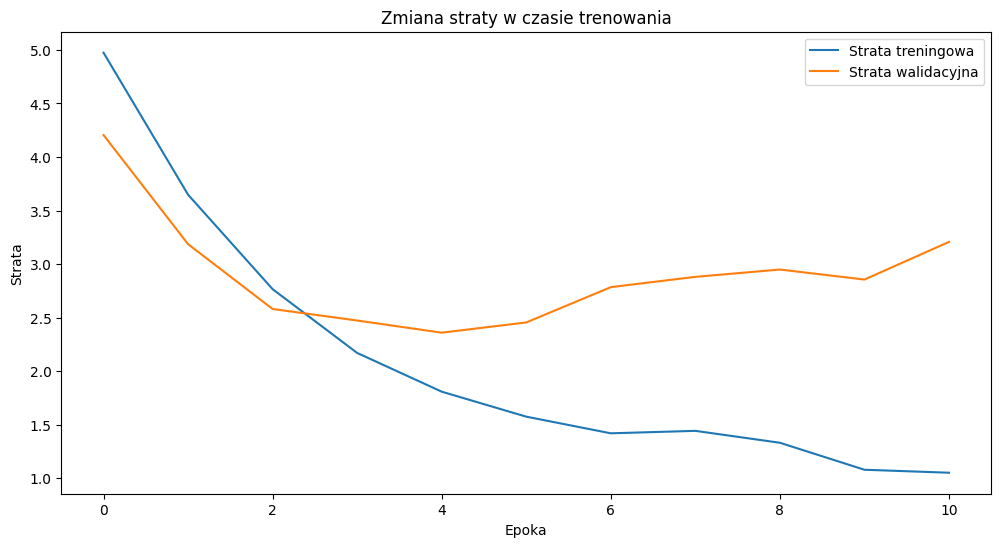

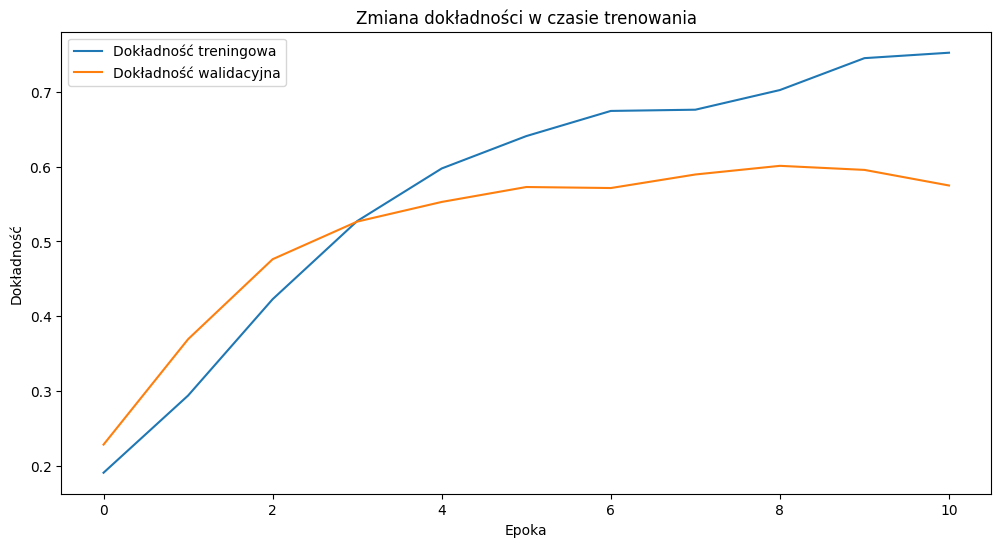

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.title('Zmiana straty w czasie trenowania')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Dokładność
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.title('Zmiana dokładności w czasie trenowania')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

    accuracy      loss  val_accuracy  val_loss
0   0.207428  4.578755      0.231431  3.897590
1   0.333560  3.258796      0.400136  2.829916
2   0.467448  2.465827      0.492527  2.445269
3   0.584749  1.885831      0.605299  2.094942
4   0.666723  1.477839      0.612772  2.157217
5   0.716882  1.187578      0.659194  2.175439
6   0.761153  0.976212      0.674592  2.126312
7   0.788327  0.839732      0.686594  2.366981
8   0.813123  0.707429      0.673234  2.540569
9   0.830842  0.633558      0.691350  2.543736
10  0.845052  0.575205      0.698143  2.779640
11  0.863734  0.499329      0.690670  2.941848
12  0.871320  0.458461      0.685462  2.940279


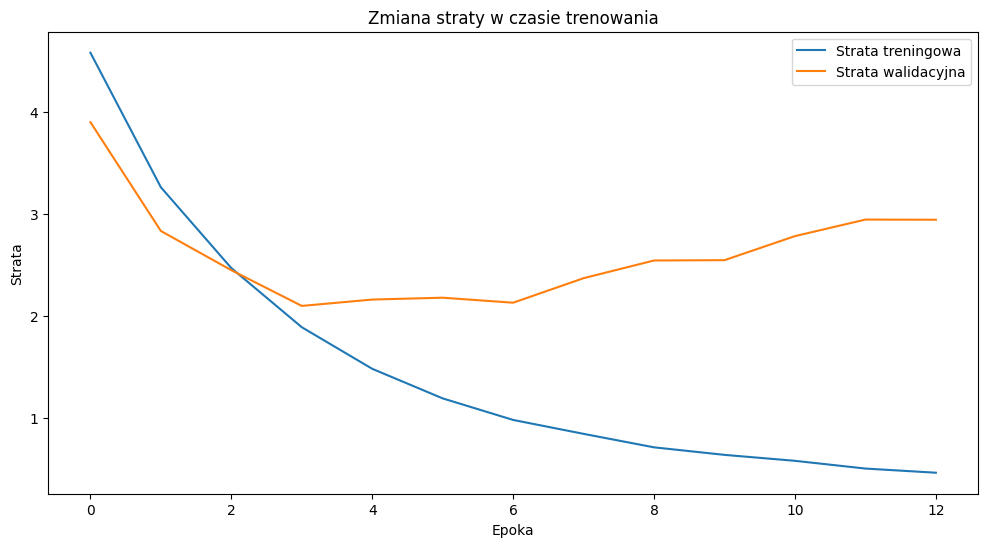

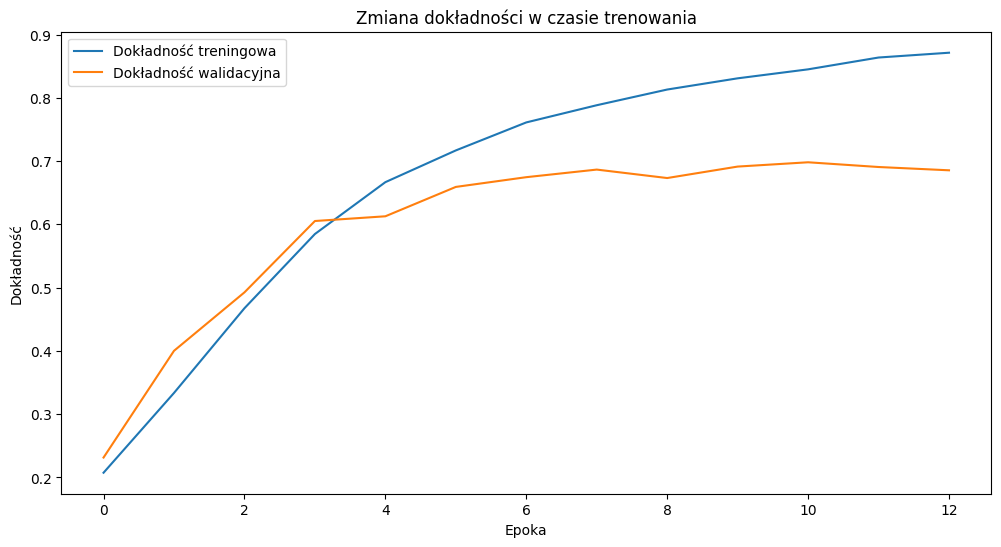

In [38]:
import pandas as pd

pd.DataFrame(history.history).to_csv('history_training/theBest_2.csv', index=False)

loaded_history = pd.read_csv('history_training/theBest_2.csv')
print(loaded_history)


plt.figure(figsize=(12, 6))
plt.plot(loaded_history['loss'], label='Strata treningowa')
plt.plot(loaded_history['val_loss'], label='Strata walidacyjna')
plt.title('Zmiana straty w czasie trenowania')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.title('Zmiana dokładności w czasie trenowania')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()


model.save("models/theBest_2.h5")